<img src="./intro_images/HDSbanner.jpg" width="100%" align="left" />

<table style="float:right;">
    <tr>
        <td>                      
            <div style="text-align: right"><a href="https://alandavies.netlify.com" target="_blank">Dr Alan Davies</a></div>
            <div style="text-align: right">Senior Lecturer health data science</div>
            <div style="text-align: right">University of Manchester</div>
         </td>
         <td>
             <img src="https://github.com/i3hsInnovation/resources/blob/efa61022d0b8893200dad308f6590e694291f8c7/images/alan.PNG?raw=true" width="30%" />
         </td>
     </tr>
</table>

# Principle Component Analysis (PCA)
****

#### About this Notebook
This notebook introduces the concept of Principal Component Analysis (PCA) for Machine Learning.


<div class="alert alert-block alert-warning"><b>Learning Objectives:</b> 
<br/> At the end of this notebook you will be able to:
    
- Investigate key features of Principle Components Analysis

- Explore some essential Machine Learning Python libraries to implement Machine Learning algorithms

</div> 

<a id="top"></a>

<b>Table of contents</b><br/>

1.0 [About PCA](#aboutpca)

2.0 [PCA For Visualisation](#pcavisualisation)

3.0 [PCA for Feature Selection and Dimensionality Reduction](#featureselect)

4.0 [Your Turn](#yourturn)

<a id="aboutpca"></a>

## 1.0 About PCA

PCA is one of the most popular <code>unsupervised</code> methods for <code>dimensionality reduction</code>. PCA can also be used for other things too, such as: 
<ul>
    <li>Data compression</li>
    <li>Visualization of higher dimensional data</li>
    <li>Speeding up Machine Learning algorithms</li>
    <li>Feature extraction</li>
    <li>Removing (denoising) noise from data</li>
</ul>
PCA is very useful when there is a lot of <code>multicolinearity</code> between features or when you have a lot of features (high dimensional data). Examples of high dimensional data can include genomic data and health data. For example, there can be over 100 features (like immune status, blood pressure, heart rate, previously diagnosed conditions, blood biomarkers, ...) in some health datasets. 
Unlike Linear Regression (see notebook on Linear Regression for more details) where we wanted to predict one variable based on another, PCA is concerned with the relationship between the data values.

<div class="alert alert-success">
<strong>Note:</strong> Multicollinearity is where $\geq$ 2 explanatory variables are highly linearly related in a regression model. 
</div>

<div class="alert alert-success">
<strong>Note:</strong>
    Essentially PCA finds the <code>hyperplane</code> closest to the data in order to project the data onto it.  
</div>

The first thing we want to do is determine which plane preserves the most variance. In the example below we can see that most of the variance in this dataset is along the red line in <code>A</code>. PCA finds the axis that represents the largest amount of variance in the data. It then finds the next largest axis and so on. It then creates these axes orthoganally (at right angles) to the previous axes (<code>B</code>). In this case there are just 2. The <code>principle component</code> is the vector that defines the $i^{th}$ axis. Put another way, these components are a series of linear transformations that aligns the feature that accounts for the greatest variance on the first axis, the next highest variance on the next axis and so forth.

<div class="alert alert-danger">
<strong>Note:</strong>
    The number of dimensions will be the same as the number of features. 
</div>

<img src="./ml_files/pca1.png" width="100%" align="left" />

<div class="alert alert-success">
<strong>Note:</strong>
A vector is a quantity with both a magnitude and direction. It is useful to be familiar with the these concepts for Machine Learning in general:<br>
    \[ 
1, 
\begin{bmatrix} 1 \\[0.3em] 2 \end{bmatrix},  
\begin{bmatrix} 1 & 2 \\[0.3em] 3 & 4 \end{bmatrix},  
\begin{bmatrix} \begin{bmatrix} 1 & 2 \end{bmatrix} & \begin{bmatrix} 3 & 4 \end{bmatrix} \\[0.3em] \begin{bmatrix} 5 & 6 \end{bmatrix} & \begin{bmatrix} 7 & 8 \end{bmatrix} \\[0.3em] 
\end{bmatrix}  
\]
From left to right separated by commas: A <strong>scalar</strong> (single value), a <strong>vector</strong>, a <strong>matrix</strong> and a <strong>tensor</strong>.
</div>

We can then rotate the data. Here we see that most of this data can be represented in a single dimension. 

<img src="./ml_files/pca2.png" width="40%" align="center" />

We can see an example below produced with the <code>mglearn</code> package. The top left image shows the original data with the 2 principle components. The top right shows what the data looks like when it has been transformed.

<img src="./ml_files/mglearn.png" width="60%" align="left" />

<div class="alert alert-danger">
<strong>Note:</strong>
    When we transform data from higher dimensional space to lower dimensional (i.e. 4D to 2D) space we lose some information (variance).
</div>

### Creating the principle components

There is not much difference between <code>variance</code> (see <b>notebook on linear regression</b> for more details on variance) and <code>covariance</code>. Covariance measures the joint variability of two variables. 



$$\text{var}(x) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{(n-1)}$$
<br>
$$\text{cov}(x,y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{(n-1)}$$


We can use covariance to create a <code>covariance matrix</code>. Computing the covariance matrix is the next step following standardization of the data (discussed later). The matrix shows how co-dependent two variables are together:<br>
$$\begin{bmatrix} \text{var(x)} & \text{cov(x,y)} \\[0.3em] \text{cov(y,x)} & \text{var(y)} \end{bmatrix}$$
$\text{cov(x,y)}$ is equal to $\text{cov(y,x)}$. The covariance matrix defines both the variance and covariance of the data, or in other words the spread and orientation of the data.

### Eigenvectors and eigenvalues

The first (longer) red line in the image below is the first eigenvector, the second (shorter) red line is the second eigenvector. Eigenvectors have a value called an eigenvalue. The direction is the eigenvector, the magnitude is the eigenvalue. Eigenvectors of a covariance matrix are orthogonal (at right angles) to one another. They are used to move (transform) the x/y axes to those represented by the principle components.

<img src="./ml_files/pca2.png" width="40%" align="center" />

Fortunately Python's <code>sklearn</code> library contains a PCA class that performs these stages for us.

[Return to top](#top)


----------



<a id="pcavisualisation"></a>

## 2.0 PCA for Visualisation

We will look at an example using the Breast cancer dataset and use <code>sklearn</code> library which has some datasets that are built-in. 
<br/>
First let's import the Breast cancer dataset from the <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> and then import the  <code>pandas</code> module as it it useful for data science and supports objects like <code>data frames</code>. 

<div class="alert alert-block alert-info">
<b>Task 1:</b>
<br> 
Have a look at the link to the data presented in the link above. <br>
    1. What information is presented about the data?<br>
    2. What information does the dataset capture?
</div>

Now you've noted some of the answers to the above questions down, let's load the dataset and import the modules needed to visualise the data.  This is shown in the code below:

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

In the code below, we have loaded the dataset into a variable called <code>cancer</code>. The other lines of code make sure that we have the correct column names. On the last line, we store the data in a dataframe object called <code>df</code> (short for data frame) to make it easier to manipulate in a tabular form. Finally we will use the <code>head()</code> function to view the first 10 records of the dataset. 

In [4]:
cancer = load_breast_cancer()
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


If you scroll along to the end of the dataframe, you can see there are a lot of features in this dataset. Specifically we can count the features (excluding the dependent variable) using the <code>len()</code> function on the columns in the dataframe.

In [5]:
print("Number of features:", len(df.columns)-1)

Number of features: 30


Let's split the data frame into features <code>X</code> and labels <code>y</code>.

In [6]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

<div class="alert alert-danger">
<strong>Note:</strong>
    You should apply <code>feature scaling</code> to your data before applying a PCA as it is sensitive to scale. We can use <code>from sklearn.preprocessing import StandardScaler</code> to scale features. Higher magnitude features lead to higher variance in those features. Feature scaling should be applied to the training data only.  
</div>

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_df = scaler.transform(X)

We can output the scaled data.

In [9]:
scaled_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Feature scaling is a method of normalisation for features. A lot of Machine Learning algorithms use distances. Imagine having 2 features with different scales, the differences between them would be different and would affect such distance calculations. For example the difference between house prices in hundreds of thousands of pounds/dollars compared to age in years. Both variables have very different magnitudes. To overcome this the features should be normalised to prevent this.

<div class="alert alert-success">
<strong>Note:</strong>
    There are many different scalers to choose from. The <code>standard scaler</code> used here assumes that the data in each feature is normally distributed. It works by scaling the features so they have a mean of 0 and a standard deviation of 1:
    $$x_\text{new} = \frac{x-\mu}{\sigma}$$
    Where: $\mu$ is the mean of the training samples and $\sigma$ is the standard deviation. If you want to learn more about this, have a look at the <a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html" target="_blank">Importance of Feature Scaling</a>.
</div>

Now let's run the PCA on the scaled data. To do this we import the <code>PCA</code> class from the <code>sklearn.decomposition</code> package.

In [10]:
from sklearn.decomposition import PCA

Next we create an instance of the PCA class and pass in the number of principle components we want. As we want to be able to visualize this data easily, we will choose 2 components.

In [11]:
pca = PCA(n_components=2)

Finally we can fit the scaled data and transform it into the required principle components.

In [12]:
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca_trans = pca.transform(scaled_df)

To check it worked let us view the number of columns (features) in <code>X</code> and then the number of columns in the scaled data <code>scaled_df</code>.

In [14]:
print("Number of features X:", X.shape[1])
print("Number of features scaled_df:", pca_trans.shape[1])

Number of features X: 30
Number of features scaled_df: 2


<div class="alert alert-success">
<strong>Note:</strong>
    The <code>shape()</code> function produces a <code>tuple</code> with two elements. The first describes the number of rows, the second the number of columns. To access the second element we provide an index in brackets (in Python the indexing system starts at 0, so 1 is the second element).  
</div>

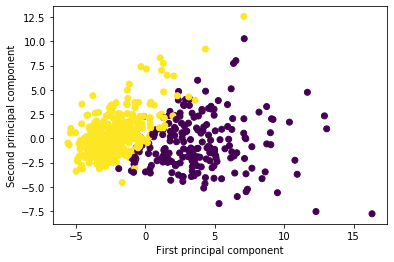

In [16]:
import matplotlib.pyplot as plt
plt.scatter(pca_trans[:,0],pca_trans[:,1],c=y);
plt.xlabel('First principal component');
plt.ylabel('Second principal component');

We have split the data into two principle components. The colour represents the class (cancer (yellow)/no-cancer (purple)).

<div class="alert alert-danger">
<strong>Note:</strong>
    If we omit the <code>n_components=?</code> from the pca i.e. <code>pca = PCA()</code> then all the features will be included.
</div>

[Return to top](#top)


----------




<a id="featureselect"></a>

## 3.0 PCA for Feature Selection and Dimensionality Reduction

We can use PCA to determine the importance of various features in our dataset. This can help us to choose which features we should include and exclude from our models. The higher the magnitude, the more important the feature. To do this we can look at which features are the most important for each principle component.

In [17]:
print(abs(pca.components_))

[[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
  0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
  0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
  0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
  0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
 [0.23385713 0.05970609 0.21518136 0.23107671 0.18611302 0.15189161
  0.06016536 0.0347675  0.19034877 0.36657547 0.10555215 0.08997968
  0.08945723 0.15229263 0.20443045 0.2327159  0.19720728 0.13032156
  0.183848   0.28009203 0.21986638 0.0454673  0.19987843 0.21935186
  0.17230435 0.14359317 0.09796411 0.00825724 0.14188335 0.27533947]]


The image below makes the distinction clearer.

<img src="./ml_files/pcs.png" width="70%" align="left" />

The features for each component can be seen inbetween the square brackets []. Each row (represented by the two colours in the image above) represents a principle component and each value a feature. So the numbers with the highest values in each row are the most important features. For example in principle component 1 the highest value is 0.26085376 which is feature number 8.

<div class="alert alert-block alert-info">
<b>Task 2:</b>
<br> 
What is the value of most important feature in the second principle component?
</div>

In [18]:
print(max(abs(pca.components_)[1]))

0.3665754713752712


We can also view the <code>explained variance ratio</code> which shows us the variance explained by each of the principle components. First we load the <code>train_test_split()</code> function and then split the data in the usual way into training and test sets.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Next we scale the data to avoid problems with different variables being on different scales.

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Next we create and run the PCA. Note that we omitted the <code>n_components</code> parameter. This means we will include all the features. 

In [21]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Next we store the explained variance ratio in a variable called <code>explained_variance</code>.

In [22]:
explained_variance = pca.explained_variance_ratio_

We can create a dataframe to view the data as a table showing the component number $(1...n)$ and the explained variance ratio.

In [23]:
df = pd.DataFrame({'Principle component': range(1,len(explained_variance)+1), 'Explained variance': abs(explained_variance)})
df

,Principle component,Explained variance
0,1,0.434308
1,2,0.197401
2,3,0.093518
3,4,0.066777
4,5,0.056425
5,6,0.040716
6,7,0.021493
7,8,0.015127
8,9,0.013968
9,10,0.011601


<div class="alert alert-block alert-info">
<b>Task 3:</b>
<br> 
With regard to the table above what are the values of the top 3 principle components?<br>
    If you want to do this with code, you can use the <code>nlargest()</code> function. More information about how to use it <a href="https://www.w3resource.com/pandas/dataframe/dataframe-nlargest.php" target="_blank">here</a>.
</div>

In [24]:
df.nlargest(3,['Explained variance','Principle component'])

,Principle component,Explained variance
0,1,0.434308
1,2,0.197401
2,3,0.093518


One way to work out how many components to include in our PCA is to plot the cumulative explained variance ratio against the number of components. So here we need around 20 components to describe 100% of the variance. 10 components describes around 95% of the variance. We can use this to determine how many components to include.

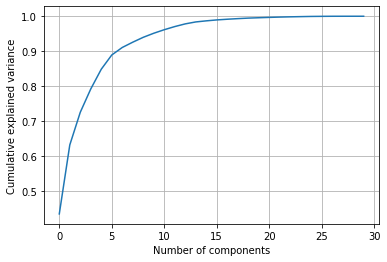

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

Once you have removed the features with the least importance, you can evaluate the effectiveness by running a Machine Learning algorithm on the data. The chosen algorithm will depend on how you want to analyse the data and the qualities of the data. Running a PCA is often done after initial data processing and before trying to create a model. 

<div class="alert alert-success">
<strong>Note:</strong>
    Data for the PCA is loaded into memory. With very large datasets one can run out of available memory. To overcome this there is an incremental PCA that uses batches of data (<code>from sklearn.decomposition import IncrementalPCA</code>).  
</div>

<div class="alert alert-danger">
<strong>Note:</strong>
    PCA is prone to being affected by outliers in data. To overcome this there are more robust versions of PCA available. 
</div>

[Return to top](#top)


----------





<a id="yourturn"></a>

## 4.0 Your Turn

Now let's try and apply what we have learned to a new dataset. This is the <code>pima-indians-diabetes</code> <a href="https://www.kaggle.com/kumargh/pimaindiansdiabetescsv/data">dataset</a> from Kaggle. The data is from the medical records of people from India. Click on the dataset link above and read the description of the data fields (columns) in the section called <code>About this file</code> so that you understand what sort of data is contained in the dataset. Let's load the file and then display the first 10 records.

In [26]:
path='./ml_files/pima-indians-diabetes.csv'
data = pd.read_csv(path)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


<div class="alert alert-block alert-info">
<b>Task 4:</b>
<br> Split the data into features <code>X</code> and labels <code>y</code>.
</div>

In [27]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

<div class="alert alert-block alert-info">
<b>Task 5:</b>
    <br> Import the <code>train_test_split</code> and split the data into <code>training</code> and <code>test</code> data for both features and labels.
</div>

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<div class="alert alert-block alert-info">
<b>Task 6:</b>
    <br> Apply feature scaling using <code>StandardScaler()</code>, fit and transform the data.
</div>

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<div class="alert alert-block alert-info">
<b>Task 7:</b>
    <br> Create an instance of PCA for all features and apply the <code>fit_transform()</code> and <code>transform()</code> functions to the <code>X_train</code> and <code>X_test</code> variables.
</div>

In [30]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

<div class="alert alert-block alert-info">
<b>Task 8:</b>
    <br> Output the components using <code>pca.components_</code> and the explained variance ration using <code>explained_variance_ratio_</code>.
</div>

In [31]:
print("Components:")
print(abs(pca.components_))
print("Explained variance ratio:")
print(abs(pca.explained_variance_ratio_))

Components:
[[0.06984296 0.39112154 0.35684797 0.44535053 0.44802765 0.45932466
  0.27926172 0.16362548]
 [0.5979397  0.17824165 0.21797755 0.30840148 0.24859608 0.02875326
  0.10750265 0.62760558]
 [0.00697864 0.52707733 0.50302722 0.28558336 0.34156108 0.36210472
  0.36668274 0.07284576]
 [0.03030215 0.34966335 0.04484526 0.00358517 0.32614326 0.0225011
  0.8731363  0.07450267]
 [0.51649416 0.41555629 0.38356287 0.50552426 0.30588571 0.22268766
  0.05192435 0.10963348]
 [0.15531002 0.12389244 0.60955381 0.02110757 0.29240521 0.70397541
  0.04567141 0.07321217]
 [0.56049015 0.26152351 0.20809113 0.00276677 0.14718866 0.1208057
  0.08489671 0.72847835]
 [0.17772597 0.39843189 0.09010873 0.60743128 0.56009503 0.31113146
  0.04053856 0.14290053]]
Explained variance ratio:
[0.26221775 0.21796968 0.12816209 0.11005445 0.09516259 0.0858845
 0.05325788 0.04729105]


------

### Notebook details
<br>
<i>Notebook created by <strong>Dr. Alan Davies</strong> with, <strong>Frances Hooley</strong> and <strong>Dr. Jon Parkinson</strong>

Publish date: September 2020<br>
Review date: Semptember 2021</i>

Please give your feedback using the button below:

<a class="typeform-share button" href="https://hub11.typeform.com/to/DssEuvB2" data-mode="popup" style="display:inline-block;text-decoration:none;background-color:#3A7685;color:white;cursor:pointer;font-family:Helvetica,Arial,sans-serif;font-size:18px;line-height:45px;text-align:center;margin:0;height:45px;padding:0px 30px;border-radius:22px;max-width:100%;white-space:nowrap;overflow:hidden;text-overflow:ellipsis;font-weight:bold;-webkit-font-smoothing:antialiased;-moz-osx-font-smoothing:grayscale;" target="_blank">Rate this notebook </a> <script> (function() { var qs,js,q,s,d=document, gi=d.getElementById, ce=d.createElement, gt=d.getElementsByTagName, id="typef_orm_share", b="https://embed.typeform.com/"; if(!gi.call(d,id)){ js=ce.call(d,"script"); js.id=id; js.src=b+"embed.js"; q=gt.call(d,"script")[0]; q.parentNode.insertBefore(js,q) } })() </script>

## Notes: